In [ ]:
 LGM VIP Data Science Internship Programme
    Beginner level:  Task 1: Iris Flower Classification
            Submitted by: Pradnya Kute

In [1]:
# Load Libraries
import numpy as np               #numpy lib used doing various operations on arrays
import pandas as pd              #pandas lib used for doing statstical calculations
import seaborn as sns            #seaborn lib is also used to interpreting the data in various graphs
import matplotlib.pyplot as plt  #Matplotlib lib is used for interpreting data in various graphs


In [2]:
# read the csv file

iris = pd.read_csv('D:/IRIS.csv')

In [3]:
iris

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,5.1,3.5,1.4,0.2,Iris-setosa
1,NaN,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,4.7,3.2,1.3,0.2,Iris-setosa
3,NaN,4.6,3.1,1.5,0.2,Iris-setosa
4,NaN,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,NaN,6.7,3.0,5.2,2.3,Iris-virginica
146,NaN,6.3,2.5,5.0,1.9,Iris-virginica
147,NaN,6.5,3.0,5.2,2.0,Iris-virginica
148,NaN,6.2,3.4,5.4,2.3,Iris-virginica


# READ DATASET

First 5 records

In [4]:
iris.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,5.1,3.5,1.4,0.2,Iris-setosa
1,NaN,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,4.7,3.2,1.3,0.2,Iris-setosa
3,NaN,4.6,3.1,1.5,0.2,Iris-setosa
4,NaN,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 6)

In [6]:
iris.isna().sum()

Unnamed: 0      150
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species           0
dtype: int64

In [7]:
iris.duplicated().sum()

3

In [8]:
iris.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
count,0.0,150.000000,150.000000,150.000000,150.000000
mean,NaN,5.843333,3.054000,3.758667,1.198667
std,NaN,0.828066,0.433594,1.764420,0.763161
min,NaN,4.300000,2.000000,1.000000,0.100000
25%,NaN,5.100000,2.800000,1.600000,0.300000
50%,NaN,5.800000,3.000000,4.350000,1.300000
75%,NaN,6.400000,3.300000,5.100000,1.800000
max,NaN,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.dtypes

Unnamed: 0      float64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
iris.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species'],
      dtype='object')

In [12]:
a = len(iris[iris['species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",a)
b = len(iris[iris['species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",b)
c = len(iris[iris['species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",c)



No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


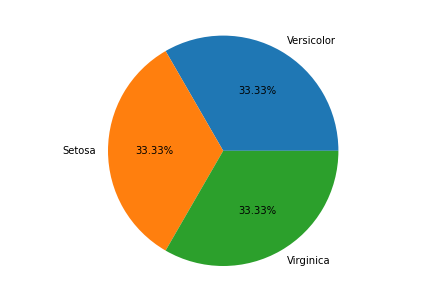

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

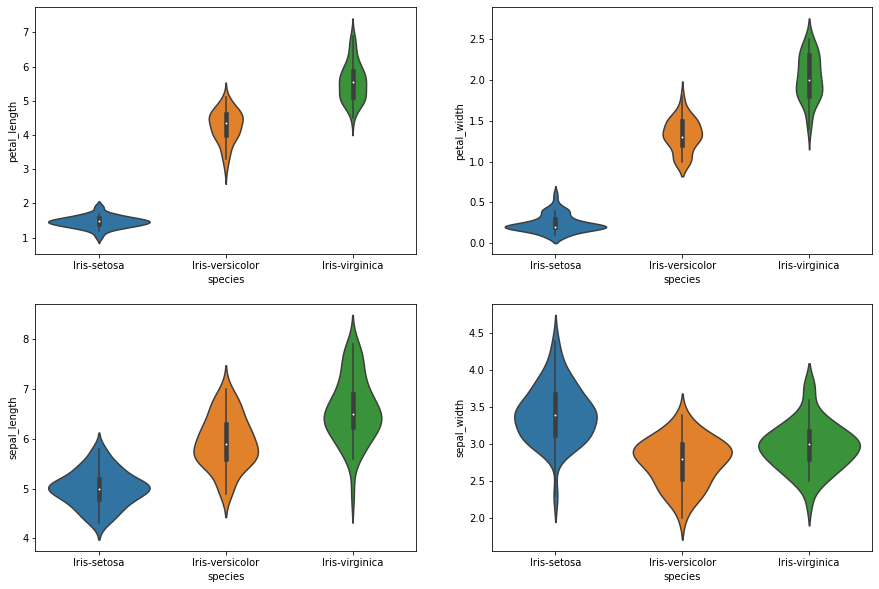

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)


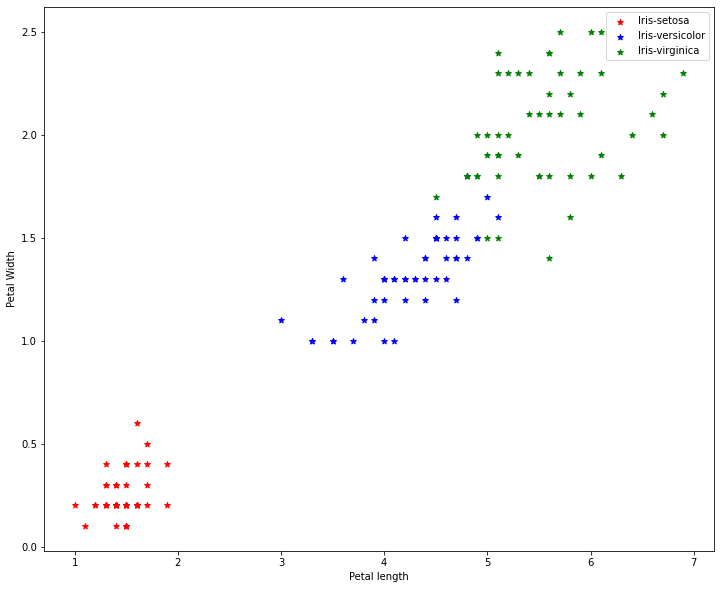

In [15]:
plt.figure(figsize=(12,10))
plt.scatter(iris.petal_length[iris.species=="Iris-setosa"],iris.petal_width[iris.species=="Iris-setosa"],c="red",label="Iris-setosa",marker='*')
plt.scatter(iris.petal_length[iris.species=="Iris-versicolor"],iris.petal_width[iris.species=="Iris-versicolor"],c='b',label="Iris-versicolor",marker='*')
plt.scatter(iris.petal_length[iris.species=="Iris-virginica"],iris.petal_width[iris.species=="Iris-virginica"],c="green",label="Iris-virginica",marker='*')

plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.legend()


# Pair plot

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


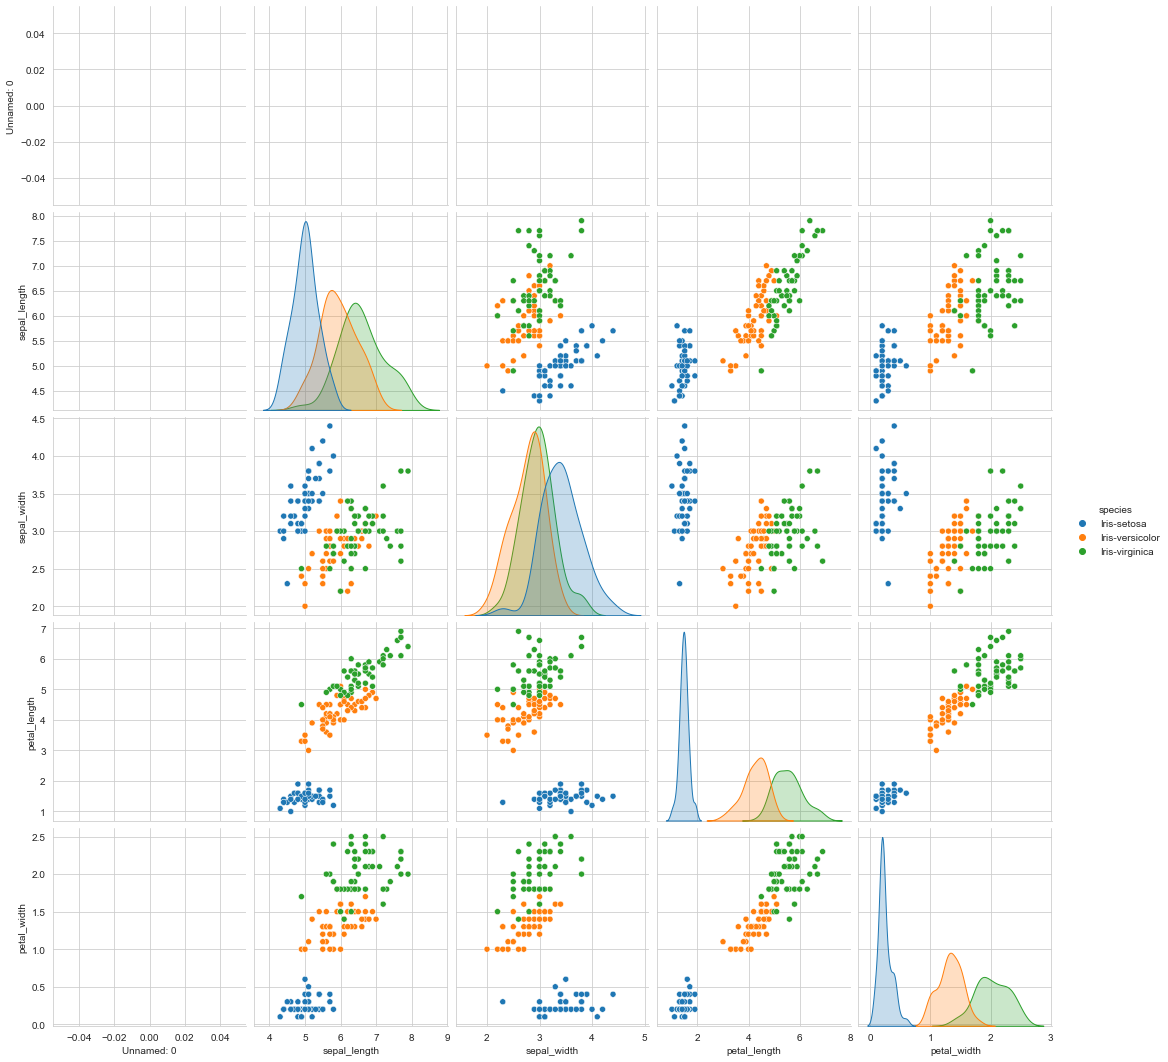

In [18]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", size=3);
plt.show()

# Split Data into training and testing

In [20]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris[['species']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# DecisionTree Classifier Model

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [22]:
#Fit Model
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [23]:
#Make predictions
y_pred = model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

# Accuracy of Model

In [24]:
model.score(X_test, y_test)

0.9666666666666667